# Suitability of roofs for the use of solar energy

_See [the official webpage](https://opendata.swiss/en/dataset/eignung-von-hausdachern-fur-die-nutzung-von-sonnenenergie) for more information._

In [1]:
import pandas as pd
import geopandas as gpd

from pyproj import CRS, Transformer

import fiona

In [2]:
# GeoPackage (GPKG) is the most convenient
# https://data.geo.admin.ch/ch.bfe.solarenergie-eignung-daecher/solarenergie-eignung-daecher/solarenergie-eignung-daecher_2056.gpkg.zip
path = "../data/solkat/SOLKAT_DACH.gpkg"

In [3]:
# Check available layers
layers = fiona.listlayers(path)
layers

['SOLKAT_CH_DACH', 'EIGNUNG_DACH', 'SB_OBJEKTART']

In [4]:
# Open the GPKG file and list metadata for each layer
layer = "SOLKAT_CH_DACH"
with fiona.open(path, layer=layer) as collection:
    print(collection.crs)
    print(collection.schema)
    print(collection.bounds)

EPSG:2056
{'properties': {'DF_UID': 'int', 'DF_NUMMER': 'int16', 'DATUM_ERSTELLUNG': 'datetime', 'DATUM_AENDERUNG': 'datetime', 'SB_UUID': 'str', 'SB_OBJEKTART': 'int16', 'SB_DATUM_ERSTELLUNG': 'datetime', 'SB_DATUM_AENDERUNG': 'datetime', 'KLASSE': 'int16', 'FLAECHE': 'float', 'AUSRICHTUNG': 'int16', 'NEIGUNG': 'int16', 'MSTRAHLUNG': 'int16', 'GSTRAHLUNG': 'int32', 'STROMERTRAG': 'int32', 'STROMERTRAG_SOMMERHALBJAHR': 'int32', 'STROMERTRAG_WINTERHALBJAHR': 'int32', 'WAERMEERTRAG': 'int32', 'DUSCHGAENGE': 'int16', 'DG_HEIZUNG': 'int16', 'DG_WAERMEBEDARF': 'int16', 'BEDARF_WARMWASSER': 'int32', 'BEDARF_HEIZUNG': 'int32', 'FLAECHE_KOLLEKTOREN': 'float', 'VOLUMEN_SPEICHER': 'int32', 'GWR_EGID': 'int32'}, 'geometry': 'MultiPolygon'}
(2486036.11, 1075234.921, 2833435.954, 1295319.095)


In [5]:
# Center at EPFL, given in WGS 84
latitude, longitude = 46.520278, 6.565556
radius = 3000

# Get relevant transforms
wgs84_crs = CRS.from_epsg(4326)
lv95_crs = CRS.from_user_input(collection.crs)
transformer = Transformer.from_crs(wgs84_crs, lv95_crs, always_xy=True)

# Get bounding box in data-space
# Note: this works, because LV95 is a flat projection in meters
x, y = transformer.transform(longitude, latitude)
bbox = (x - radius, y - radius, x + radius, y + radius)

In [6]:
# Load a few lines
gdf = gpd.read_file(
    path,
    layer=layer,
    bbox=bbox,
    rows=10,
    engine="pyogrio",
    use_arrow=True,
)
gdf

,DF_UID,DF_NUMMER,DATUM_ERSTELLUNG,DATUM_AENDERUNG,SB_UUID,SB_OBJEKTART,SB_DATUM_ERSTELLUNG,SB_DATUM_AENDERUNG,KLASSE,FLAECHE,...,WAERMEERTRAG,DUSCHGAENGE,DG_HEIZUNG,DG_WAERMEBEDARF,BEDARF_WARMWASSER,BEDARF_HEIZUNG,FLAECHE_KOLLEKTOREN,VOLUMEN_SPEICHER,GWR_EGID,geometry
0,19724858,1,2022-10-24 10:34:54+00:00,2022-10-24 10:34:54+00:00,{78222340-C4DD-4AAF-8861-275BD91F688A},1,2016-01-05 00:00:00+00:00,2016-01-05 00:00:00+00:00,3,12.357986,...,0,0,0,0,0,0,0.0,0,280045055.0,"MULTIPOLYGON (((2530881.091 1151108.198, 25308..."
1,19724859,2,2022-10-24 10:34:55+00:00,2022-10-24 10:34:55+00:00,{78222340-C4DD-4AAF-8861-275BD91F688A},1,2016-01-05 00:00:00+00:00,2016-01-05 00:00:00+00:00,3,11.459411,...,0,0,0,0,0,0,0.0,0,280045055.0,"MULTIPOLYGON (((2530882.836 1151108.233, 25308..."
2,19328825,2,2022-10-24 02:08:03+00:00,2022-10-24 02:08:03+00:00,{F62A9648-B2B5-4A0E-8CB8-9C31AC31C458},17,2020-12-11 18:07:17+00:00,2020-12-14 10:13:51+00:00,1,7.045077,...,0,0,0,0,0,0,0.0,0,NaN,"MULTIPOLYGON (((2532535.64 1151145.393, 253252..."
3,19328826,3,2022-10-24 02:08:03+00:00,2022-10-24 02:08:03+00:00,{F62A9648-B2B5-4A0E-8CB8-9C31AC31C458},17,2020-12-11 18:07:17+00:00,2020-12-14 10:13:51+00:00,1,3.059257,...,0,0,0,0,0,0,0.0,0,NaN,"MULTIPOLYGON (((2532517.899 1151146.76, 253252..."
4,19328827,4,2022-10-24 02:08:04+00:00,2022-10-24 02:08:04+00:00,{F62A9648-B2B5-4A0E-8CB8-9C31AC31C458},17,2020-12-11 18:07:17+00:00,2020-12-14 10:13:51+00:00,1,2.923348,...,0,0,0,0,0,0,0.0,0,NaN,"MULTIPOLYGON (((2532524.62 1151137.462, 253252..."
5,19328824,1,2022-10-24 02:08:02+00:00,2022-10-24 02:08:02+00:00,{F62A9648-B2B5-4A0E-8CB8-9C31AC31C458},17,2020-12-11 18:07:17+00:00,2020-12-14 10:13:51+00:00,1,1.518187,...,0,0,0,0,0,0,0.0,0,NaN,"MULTIPOLYGON (((2532537.891 1151147.191, 25325..."
6,19328804,4,2022-10-24 02:07:32+00:00,2022-10-24 02:07:32+00:00,{E1559682-B83B-442F-AC1C-461654872B10},17,2020-12-11 17:05:04+00:00,2020-12-11 17:05:04+00:00,2,5.138046,...,0,0,0,0,0,0,0.0,0,NaN,"MULTIPOLYGON (((2532619.419 1151166.924, 25326..."
7,19328803,3,2022-10-24 02:07:31+00:00,2022-10-24 02:07:31+00:00,{E1559682-B83B-442F-AC1C-461654872B10},17,2020-12-11 17:05:04+00:00,2020-12-11 17:05:04+00:00,1,9.737828,...,0,0,0,0,0,0,0.0,0,NaN,"MULTIPOLYGON (((2532614.218 1151171.61, 253261..."
8,19328802,2,2022-10-24 02:07:30+00:00,2022-10-24 02:07:30+00:00,{E1559682-B83B-442F-AC1C-461654872B10},17,2020-12-11 17:05:04+00:00,2020-12-11 17:05:04+00:00,1,7.234392,...,0,0,0,0,0,0,0.0,0,NaN,"MULTIPOLYGON (((2532604.363 1151180.489, 25326..."
9,19328801,1,2022-10-24 02:07:30+00:00,2022-10-24 02:07:30+00:00,{E1559682-B83B-442F-AC1C-461654872B10},17,2020-12-11 17:05:04+00:00,2020-12-11 17:05:04+00:00,1,9.662291,...,0,0,0,0,0,0,0.0,0,NaN,"MULTIPOLYGON (((2532597.072 1151187.128, 25325..."


In [7]:
gdf.columns

Index(['DF_UID', 'DF_NUMMER', 'DATUM_ERSTELLUNG', 'DATUM_AENDERUNG', 'SB_UUID',
       'SB_OBJEKTART', 'SB_DATUM_ERSTELLUNG', 'SB_DATUM_AENDERUNG', 'KLASSE',
       'FLAECHE', 'AUSRICHTUNG', 'NEIGUNG', 'MSTRAHLUNG', 'GSTRAHLUNG',
       'STROMERTRAG', 'STROMERTRAG_SOMMERHALBJAHR',
       'STROMERTRAG_WINTERHALBJAHR', 'WAERMEERTRAG', 'DUSCHGAENGE',
       'DG_HEIZUNG', 'DG_WAERMEBEDARF', 'BEDARF_WARMWASSER', 'BEDARF_HEIZUNG',
       'FLAECHE_KOLLEKTOREN', 'VOLUMEN_SPEICHER', 'GWR_EGID', 'geometry'],
      dtype='object')

See _Solarenergie: Eignung Dächer (Sonnendach.ch), Solarenergie: Eignung Fassaden (Sonnenfassade.ch) – Dokumentation Geodatenmodell_ on [this page](https://www.bfe.admin.ch/bfe/en/home/supply/digitalization-and-geoinformation/digital-applications/solar-roof.html) for more information on the format.

 * `DF_UID`: Unique roof surface identifier.
 * `DF_NUMMER`: Sequential number assigned to each roof surface, unique within a single building.
 * `SB_UUID`: Associated building identifier in swissBUILDINGS3D.
 * `SB_OBJEKTART`: Building type, as specified in swissBUILDINGS3D.
 * `KLASSE`: Suitability of the roof for solar energy production, based on the average solar radiation (i.e. ` MSTRAHLUNG`).
 * `FLAECHE`: Usable surface area of the roof, for solar panel; this takes into account the slope.
 * `AUSRICHTUNG`: Roof surface orientation (0° is South, 90° is West).
 * `NEIGUNG`: Roof surface slope/tilt (0° is flat).
 * `MSTRAHLUNG`: Average annual solar radiation (kWh/m²/year), taking shading into account
 * `GSTRAHLUNG`: Total annual solar radiation (kWh/year), taking shading into account
 * ...


In [8]:
# Load complete dataset, in chosen bounding box
gdf = gpd.read_file(
    path,
    layer=layer,
    bbox=bbox,
    engine="pyogrio",
    use_arrow=True,
)
gdf

,DF_UID,DF_NUMMER,DATUM_ERSTELLUNG,DATUM_AENDERUNG,SB_UUID,SB_OBJEKTART,SB_DATUM_ERSTELLUNG,SB_DATUM_AENDERUNG,KLASSE,FLAECHE,...,WAERMEERTRAG,DUSCHGAENGE,DG_HEIZUNG,DG_WAERMEBEDARF,BEDARF_WARMWASSER,BEDARF_HEIZUNG,FLAECHE_KOLLEKTOREN,VOLUMEN_SPEICHER,GWR_EGID,geometry
0,19724858,1,2022-10-24 10:34:54+00:00,2022-10-24 10:34:54+00:00,{78222340-C4DD-4AAF-8861-275BD91F688A},1,2016-01-05 00:00:00+00:00,2016-01-05 00:00:00+00:00,3,12.357986,...,0,0,0,0,0,0,0.000000,0,280045055.0,"MULTIPOLYGON (((2530881.091 1151108.198, 25308..."
1,19724859,2,2022-10-24 10:34:55+00:00,2022-10-24 10:34:55+00:00,{78222340-C4DD-4AAF-8861-275BD91F688A},1,2016-01-05 00:00:00+00:00,2016-01-05 00:00:00+00:00,3,11.459411,...,0,0,0,0,0,0,0.000000,0,280045055.0,"MULTIPOLYGON (((2530882.836 1151108.233, 25308..."
2,19328825,2,2022-10-24 02:08:03+00:00,2022-10-24 02:08:03+00:00,{F62A9648-B2B5-4A0E-8CB8-9C31AC31C458},17,2020-12-11 18:07:17+00:00,2020-12-14 10:13:51+00:00,1,7.045077,...,0,0,0,0,0,0,0.000000,0,NaN,"MULTIPOLYGON (((2532535.64 1151145.393, 253252..."
3,19328826,3,2022-10-24 02:08:03+00:00,2022-10-24 02:08:03+00:00,{F62A9648-B2B5-4A0E-8CB8-9C31AC31C458},17,2020-12-11 18:07:17+00:00,2020-12-14 10:13:51+00:00,1,3.059257,...,0,0,0,0,0,0,0.000000,0,NaN,"MULTIPOLYGON (((2532517.899 1151146.76, 253252..."
4,19328827,4,2022-10-24 02:08:04+00:00,2022-10-24 02:08:04+00:00,{F62A9648-B2B5-4A0E-8CB8-9C31AC31C458},17,2020-12-11 18:07:17+00:00,2020-12-14 10:13:51+00:00,1,2.923348,...,0,0,0,0,0,0,0.000000,0,NaN,"MULTIPOLYGON (((2532524.62 1151137.462, 253252..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33771,19761030,2,2022-10-25 08:30:47+00:00,2022-10-25 08:30:47+00:00,{282DA165-51FE-4838-B6F7-3FED965F6FD9},1,2016-01-05 00:00:00+00:00,2016-02-18 08:51:50+00:00,3,166.085976,...,3984,9,17,18,972,20754,20.729939,1600,280006231.0,"MULTIPOLYGON (((2532067.765 1155481.848, 25320..."
33772,19761031,1,2022-10-25 08:30:50+00:00,2022-10-25 08:30:50+00:00,{E2C96917-2736-4634-9A2F-C539993C4229},1,2016-02-17 15:32:41+00:00,2016-02-17 15:32:46+00:00,1,24.393758,...,7743,18,2,5,70112,75054,24.393758,1800,280058684.0,"MULTIPOLYGON (((2532170.78 1155484.368, 253216..."
33773,19760765,1,2022-10-25 08:22:35+00:00,2022-10-25 08:22:35+00:00,{A522CC08-AE3A-45CE-AE4A-499DC8F0CA45},8,2016-01-05 00:00:00+00:00,2016-01-05 00:00:00+00:00,4,77.219584,...,0,0,0,0,0,0,0.000000,0,NaN,"MULTIPOLYGON (((2531718.638 1155486.67, 253171..."
33774,19760764,1,2022-10-25 08:22:33+00:00,2022-10-25 08:22:33+00:00,{607E9DF6-7323-41CC-A252-DF30A78D58DA},8,2016-01-05 00:00:00+00:00,2016-01-05 00:00:00+00:00,4,55.740847,...,9997,24,8,10,4452,96706,33.904300,2500,9020383.0,"MULTIPOLYGON (((2531709.85 1155468.028, 253170..."


In [9]:
# There are all polygonal shapes
gdf.geom_type.value_counts()

MultiPolygon    33776
Name: count, dtype: int64

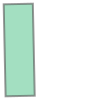

In [10]:
gdf.geometry[0]